# Problem 2.1

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 2**

**Problem 2.1**


**The temperature of the surface of the Sun is 5780 K.**

**(a) Assuming that the Sun is a black body, calculate the total radiant emittance in W/m$^2$ and the
wavelength at which emission peaks.**

**(b) Consider a hypothetical future in which the Sun temperature has decreased to half that of today.**

**Calculate how the radiant emittance and peak would change for both temperatures and draw a freehand sketch of the spectral distribution of the Sun’s emittance of both temperatures with
arbitrary units. Discuss the differences.**

We will use the package [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

We start by defining the Planck's law

In [16]:
WV_INI = 100 # [nm]
WV_MAX = 3000 # [nm]

h = constants.h # 6.626e-34 [J·s]
c = constants.speed_of_light # 3.0e+8 [m/s]
k_B = constants.Boltzmann # 1.38e-23 [J/K]
π = constants.pi # 3.141592
planck_law = lambda λ, T: 8 * π * h * c ** 2 / (λ**5) * 1 / (np.exp(h * c / (λ * k_B * T)) - 1) * 1e-9

And then we plot spectral emittances

Text(0, 0.5, 'Spectral emittance [$a.u.$]')

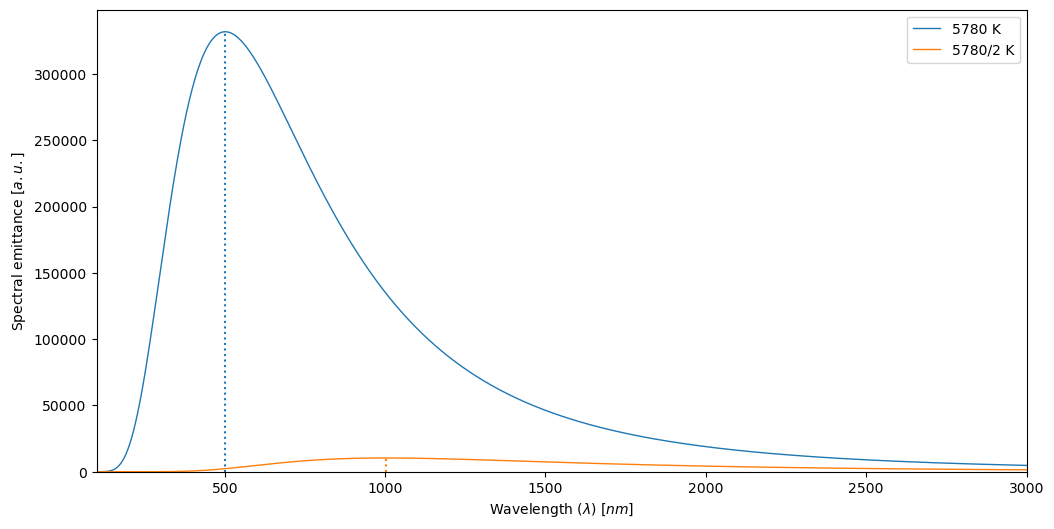

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

wavelengths = np.linspace(start=WV_INI, stop=WV_MAX, num=1000) # [nm]

solid_angle_arbitrary = 1

emittance_5780 = planck_law(λ=wavelengths*1e-9, T=5780)
emittance_5780_2 = planck_law(λ=wavelengths*1e-9, T=5780/2)

ax.plot(wavelengths, emittance_5780, linewidth=1, label='5780 K')
ax.plot(wavelengths, emittance_5780_2, linewidth=1, label='5780/2 K')

ax.vlines(x=wavelengths[emittance_5780.argmax()], ymin=0, ymax=emittance_5780.max(), linestyle=':', color='C0')
ax.vlines(x=wavelengths[emittance_5780_2.argmax()], ymin=0, ymax=emittance_5780_2.max(), linestyle=':', color='C1')

ax.legend()

ax.set_ylim(bottom=0)
ax.set_xlim([WV_INI, WV_MAX])

ax.set_xlabel("Wavelength ($\lambda$) [$nm$]")
ax.set_ylabel("Spectral emittance [$a.u.$]")